__Files created__
- all_features_scaled.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Scaling

In [3]:
features = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Features/all_features.csv')
features

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,paragraph_count,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,edit_per_day,edit_per_editor,revert_count,discussion_count,quality
0,Mayan languages,182013,37370,6527,181,9294,957,12,25,81,...,2533,832,466,366,719,0.324452,3.044471,415,472,1
1,Mu'awiya I,207068,67665,12267,338,16816,1571,14,17,75,...,3947,1377,657,720,1136,0.509159,2.866376,721,970,1
2,The Fountainhead,180464,36772,6647,243,9321,924,11,21,54,...,2318,1104,486,618,971,0.296761,2.099638,228,218,1
3,Northern pintail,218361,13230,2453,66,3181,226,8,2,27,...,763,376,282,94,334,0.098706,2.029255,86,54,1
4,Manhattan Project,19603,101197,18039,582,26102,2908,25,31,148,...,6417,2647,1281,1366,2296,0.766850,2.424254,1112,847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,1927,323,8,515,65,2,0,7,...,89,53,41,12,46,0.011623,1.679245,3,12,0
5196,Minawara and Multultu,95240,421,83,4,101,6,1,0,1,...,34,29,27,2,29,0.004280,1.172414,1,3,0
5197,Theophylline/ephedra/hydroxyzine,262652,282,54,3,66,4,1,0,1,...,45,34,30,4,32,0.005873,1.323529,2,3,0
5198,"Channel Lake, Illinois",111450,2336,499,15,571,37,3,2,7,...,72,47,44,3,42,0.009087,1.531915,0,6,0


In [ ]:
df_length = features.iloc[:, list(range(2, 7)) + [-1]]
df_structure = features.iloc[:, list(range(7, 24)) + [-1]]
df_style = features.iloc[:, list(range(24, 31)) + [-1]]
df_readability = features.iloc[:, list(range(31, 38)) + [-1]]
df_edit = features.iloc[:, 38:]

In [ ]:
df_length.describe()

,char_count,word_count,sentence_count,syllable_count,complex_word_count,quality
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,24908.259423,4549.784423,137.472308,6172.037308,563.075385,0.500000
std,22480.772004,4030.247244,124.179464,5543.763889,541.749469,0.500048
min,67.000000,13.000000,1.000000,19.000000,0.000000,0.000000
25%,6428.750000,1188.250000,34.000000,1581.750000,130.000000,0.000000
50%,19459.500000,3590.000000,108.000000,4843.500000,414.000000,0.500000
75%,36927.250000,6763.500000,205.000000,9168.000000,827.000000,1.000000
max,220333.000000,37776.000000,1066.000000,56089.000000,6049.000000,1.000000


In [ ]:
df_structure.describe()

,section_count,subsection_count,paragraph_count,mean_section_size,mean_paragraph_size,longest_section_size,shortest_section_size,abstract_size,abstract_text_ratio,citation_count,citation_per_text,external_link_count,internal_link_count,link_per_text,image_count,image_per_text,infobox,quality
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,10.191154,9.062500,48.795769,2059.258142,488.872114,8516.374231,640.271154,1536.526154,0.144491,94.639231,0.004018,6.099231,221.347500,0.012298,7.133077,0.000284,0.747308,0.500000
std,5.768870,9.870704,42.068412,1635.997417,222.897971,8295.311138,1091.426436,1011.642878,0.229935,110.368781,0.009025,23.839105,207.850153,0.030405,9.364023,0.000609,0.434598,0.500048
min,0.000000,0.000000,1.000000,0.000000,17.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,18.000000,792.524306,309.077586,2704.750000,47.000000,642.000000,0.047301,11.000000,0.002035,0.000000,69.000000,0.007285,1.000000,0.000043,0.000000,0.000000
50%,9.000000,6.000000,40.000000,1758.762500,476.880692,6426.500000,266.500000,1481.500000,0.068947,55.000000,0.003711,1.000000,171.000000,0.010046,4.000000,0.000206,1.000000,0.500000
75%,13.000000,14.000000,68.000000,2943.147343,654.069470,11561.500000,837.750000,2265.000000,0.110668,142.000000,0.005279,4.000000,313.000000,0.013655,10.000000,0.000376,1.000000,1.000000
max,67.000000,80.000000,875.000000,17554.800000,1517.793103,88963.000000,28136.000000,5769.000000,1.056478,854.000000,0.600000,763.000000,2072.000000,1.843333,108.000000,0.031879,1.000000,1.000000


In [ ]:
df_style.describe()

,mean_sentence_size,largest_sentence_size,shortest_sentence_size,question_count,exclamation_count,pronoun_start_count,pronoun_start_count_sentence_ratio,quality
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,186.334203,799.611154,32.784231,0.532885,0.718846,10.099231,0.067786,0.500000
std,62.262167,770.842634,40.310609,1.645336,3.474606,17.458994,0.100961,0.500048
min,15.500000,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.172229,476.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,176.169892,621.000000,28.000000,0.000000,0.000000,2.000000,0.019017,0.500000
75%,200.373572,871.000000,40.000000,0.000000,0.000000,12.000000,0.107143,1.000000
max,1033.000000,14618.000000,1033.000000,39.000000,188.000000,133.000000,0.833333,1.000000


In [ ]:
df_readability.describe()

,ARI,CLI,FRE,FKG,GFI,LIX,SMOG,quality
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,13.189231,11.406560,56.141781,10.480962,11.047504,49.507112,12.415673,0.500000
std,3.145784,2.052873,11.199712,2.565599,2.362797,8.056256,2.230440,0.500048
min,3.400000,4.250000,-12.790000,2.800000,4.000000,18.400000,0.000000,0.000000
25%,12.000000,10.570000,49.650000,9.400000,10.160000,46.510000,11.500000,0.000000
50%,13.500000,11.490000,56.690000,10.700000,11.290000,50.570000,12.600000,0.500000
75%,14.900000,12.590000,61.670000,11.900000,12.290000,54.090000,13.700000,1.000000
max,36.600000,19.720000,93.640000,29.000000,29.650000,98.710000,22.800000,1.000000


In [ ]:
df_edit.describe()

,article_age_days,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,edit_per_day,edit_per_editor,revert_count,discussion_count,quality
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,7958.546346,1965.950769,810.614615,432.603269,378.043846,690.930769,0.243562,2.212193,301.744615,288.465192,0.500000
std,225.542108,2805.533720,1042.911910,511.731670,549.432751,876.783830,0.342612,0.785620,537.643364,1072.900275,0.500048
min,6977.000000,6.000000,5.000000,4.000000,0.000000,5.000000,0.000755,1.000000,0.000000,2.000000,0.000000
25%,7779.000000,263.000000,133.000000,101.750000,29.000000,116.000000,0.033139,1.709391,12.000000,18.000000,0.000000
50%,7921.000000,923.000000,405.000000,256.500000,148.000000,348.000000,0.116690,2.081165,78.000000,67.000000,0.500000
75%,8145.250000,2469.750000,1033.000000,556.250000,475.250000,880.250000,0.307454,2.498771,325.000000,222.000000,1.000000
max,8558.000000,27936.000000,8450.000000,4944.000000,5249.000000,6793.000000,3.502871,13.966102,5872.000000,32907.000000,1.000000


In [4]:
scaling_features = features.columns
exclude_features = ['title', 'page_id', 'infobox', 'quality']
scaling_features = scaling_features.difference(exclude_features)

In [5]:
# Standardisation
scaler = StandardScaler()

In [6]:
df_scaled = features.copy()
df_scaled[scaling_features] = scaler.fit_transform(df_scaled[scaling_features])

In [7]:
df_scaled

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,paragraph_count,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,edit_per_day,edit_per_editor,revert_count,discussion_count,quality
0,Mayan languages,182013,0.554382,0.490641,0.350556,0.563203,0.727204,0.313583,1.614782,0.765594,...,0.202138,0.020507,0.065268,-0.021923,0.032017,0.236123,1.059491,0.210672,0.171081,1
1,Mu'awiya I,207068,1.902108,1.915008,1.614977,1.920173,1.860678,0.660305,0.804225,0.622956,...,0.706190,0.543133,0.438547,0.622440,0.507665,0.775288,0.832776,0.779877,0.635288,1
2,The Fountainhead,180464,0.527779,0.520419,0.849882,0.568074,0.666285,0.140222,1.209503,0.123721,...,0.125496,0.281341,0.104355,0.436776,0.319459,0.155290,-0.143283,-0.137176,-0.065684,1
3,Northern pintail,218361,-0.519528,-0.520312,-0.575612,-0.539584,-0.622258,-0.379860,-0.715570,-0.518153,...,-0.428819,-0.416772,-0.294330,-0.517026,-0.407130,-0.422839,-0.232880,-0.401317,-0.218555,1
4,Manhattan Project,19603,3.393837,3.347316,3.580064,3.595369,4.328846,2.567274,2.222700,2.358391,...,1.586678,1.760994,1.658053,1.798311,1.830809,1.527498,0.269954,1.507195,0.520634,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,-1.022361,-1.048866,-1.042723,-1.020531,-0.919472,-1.420025,-0.918209,-0.993615,...,-0.669082,-0.726511,-0.765325,-0.666285,-0.735635,-0.677037,-0.678444,-0.555709,-0.257705,0
5196,Minawara and Multultu,95240,-1.089358,-1.108422,-1.074937,-1.095216,-1.028389,-1.593386,-0.918209,-1.136253,...,-0.688688,-0.749526,-0.792686,-0.684488,-0.755026,-0.698471,-1.323641,-0.559429,-0.266094,0
5197,Theophylline/ephedra/hydroxyzine,262652,-1.095542,-1.115618,-1.082991,-1.101530,-1.032081,-1.593386,-0.918209,-1.136253,...,-0.684766,-0.744731,-0.786822,-0.680847,-0.751604,-0.693822,-1.131271,-0.557569,-0.266094,0
5198,"Channel Lake, Illinois",111450,-1.004166,-1.005192,-0.986347,-1.010428,-0.971161,-1.246665,-0.715570,-0.993615,...,-0.675142,-0.732265,-0.759462,-0.682668,-0.740197,-0.684439,-0.865996,-0.561290,-0.263298,0


In [ ]:
df_scaled.to_csv('/content/drive/MyDrive/학교/Dissertation/Dissertation_final/Data Preprocessing/all_features_scaled.csv', index=False)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_scaled = features.copy()
df_scaled[scaling_features] = scaler.fit_transform(df_scaled[scaling_features])

### Outliers
- abstract-text length ratio: extreme outliers

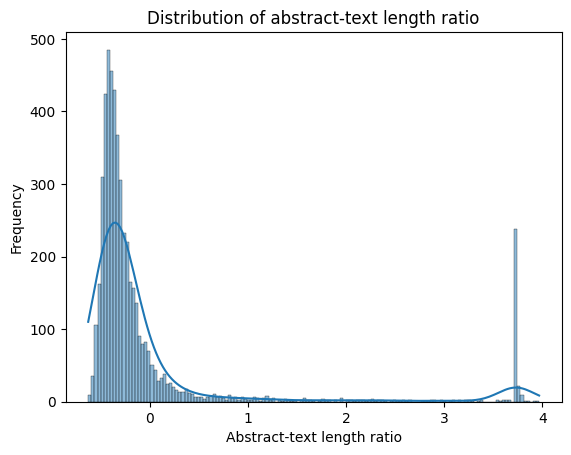

In [10]:
# Abstract-text length ratio
sns.histplot(df_scaled['abstract_text_ratio'], kde=True)

plt.title('Distribution of abstract-text length ratio')
plt.xlabel('Abstract-text length ratio')
plt.ylabel('Frequency')
plt.show()

In [12]:
df_scaled[df_scaled['abstract_text_ratio']>=3.7]

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,paragraph_count,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,edit_per_day,edit_per_editor,revert_count,discussion_count,quality
177,Cai Lun,140955,-0.976629,-0.989063,-0.994401,-0.974529,-0.901011,1.180387,1.209503,-1.064934,...,-0.150414,-0.294027,-0.220065,-0.353205,-0.280519,-0.148014,1.083705,-0.085092,-0.139323,1
210,Penda of Mercia,145326,-1.061554,-1.082118,-1.066884,-1.064368,-0.997006,0.833666,-0.918209,-1.112480,...,-0.254860,-0.528969,-0.466311,-0.569813,-0.539445,-0.248782,3.332621,-0.451541,-0.116019,1
438,Osiris myth,49471,-1.013820,-1.032489,-1.002455,-1.018005,-0.960085,-0.553221,0.094987,-1.064934,...,-0.314748,-0.301698,-0.394001,-0.205766,-0.301050,-0.321017,-0.036568,-0.174379,-0.178473,1
726,Constantine II of Scotland,7235,-0.994068,-1.004696,-0.994401,-0.998522,-0.949008,0.486944,-0.918209,-1.064934,...,-0.484429,-0.535681,-0.470220,-0.578914,-0.541726,-0.496170,0.250192,-0.470142,-0.132798,1
822,"Edgar, King of England",47399,-1.011729,-1.033481,-1.002455,-1.012954,-0.932394,0.486944,-0.107652,-1.088707,...,-0.409570,-0.355399,-0.247425,-0.444217,-0.356942,-0.417373,-0.452393,-0.365974,-0.213894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,Lundtoft Municipality,146822,-1.062889,-1.082366,-1.050776,-1.061662,-0.989622,-1.420025,-0.918209,-1.017388,...,-0.686905,-0.746649,-0.788777,-0.682668,-0.752745,-0.696552,-1.264655,-0.557569,-0.261434,0
5193,Current asset,265291,-1.037442,-1.058792,-1.034669,-1.034782,-0.949008,-1.593386,-0.918209,-1.064934,...,-0.636999,-0.645960,-0.685197,-0.588015,-0.638680,-0.642736,-1.152861,-0.529667,-0.253976,0
5195,Party of Democratic Kampuchea,265468,-1.022361,-1.048866,-1.042723,-1.020531,-0.919472,-1.420025,-0.918209,-0.993615,...,-0.669082,-0.726511,-0.765325,-0.666285,-0.735635,-0.677037,-0.678444,-0.555709,-0.257705,0
5196,Minawara and Multultu,95240,-1.089358,-1.108422,-1.074937,-1.095216,-1.028389,-1.593386,-0.918209,-1.136253,...,-0.688688,-0.749526,-0.792686,-0.684488,-0.755026,-0.698471,-1.323641,-0.559429,-0.266094,0


In [18]:
df_outliers = df_scaled.copy()
df_outliers.drop(df_scaled[df_scaled['abstract_text_ratio']>=3.7].index, inplace=True)
df_outliers

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,paragraph_count,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,edit_per_day,edit_per_editor,revert_count,discussion_count,quality
0,Mayan languages,182013,0.554382,0.490641,0.350556,0.563203,0.727204,0.313583,1.614782,0.765594,...,0.202138,0.020507,0.065268,-0.021923,0.032017,0.236123,1.059491,0.210672,0.171081,1
1,Mu'awiya I,207068,1.902108,1.915008,1.614977,1.920173,1.860678,0.660305,0.804225,0.622956,...,0.706190,0.543133,0.438547,0.622440,0.507665,0.775288,0.832776,0.779877,0.635288,1
2,The Fountainhead,180464,0.527779,0.520419,0.849882,0.568074,0.666285,0.140222,1.209503,0.123721,...,0.125496,0.281341,0.104355,0.436776,0.319459,0.155290,-0.143283,-0.137176,-0.065684,1
3,Northern pintail,218361,-0.519528,-0.520312,-0.575612,-0.539584,-0.622258,-0.379860,-0.715570,-0.518153,...,-0.428819,-0.416772,-0.294330,-0.517026,-0.407130,-0.422839,-0.232880,-0.401317,-0.218555,1
4,Manhattan Project,19603,3.393837,3.347316,3.580064,3.595369,4.328846,2.567274,2.222700,2.358391,...,1.586678,1.760994,1.658053,1.798311,1.830809,1.527498,0.269954,1.507195,0.520634,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5187,Knesselare,155065,-1.065691,-1.086833,-1.058830,-1.068698,-0.989622,-1.246665,-0.918209,-1.041161,...,-0.674072,-0.724594,-0.739918,-0.686308,-0.731072,-0.683166,-1.080215,-0.561290,-0.265162,0
5188,India Today,220131,-1.051233,-1.070703,-1.050776,-1.053364,-0.982237,-1.246665,-0.918209,-1.064934,...,-0.543247,-0.505954,-0.489763,-0.504285,-0.502944,-0.544013,-0.827904,-0.460842,-0.258637,0
5194,"Holiday Hills, Illinois",111656,-1.021383,-1.024300,-0.994401,-1.028649,-0.976699,-1.073304,-0.715570,-0.993615,...,-0.668369,-0.725553,-0.747736,-0.680847,-0.737916,-0.677439,-0.670882,-0.557569,-0.259569,0
5198,"Channel Lake, Illinois",111450,-1.004166,-1.005192,-0.986347,-1.010428,-0.971161,-1.246665,-0.715570,-0.993615,...,-0.675142,-0.732265,-0.759462,-0.682668,-0.740197,-0.684439,-0.865996,-0.561290,-0.263298,0


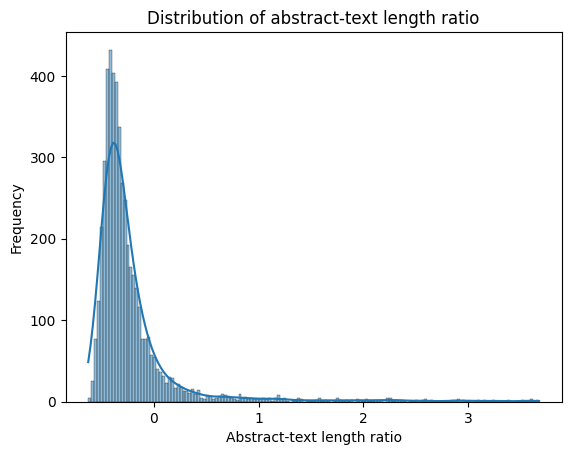

In [19]:
# Abstract-text length ratio
sns.histplot(df_outliers['abstract_text_ratio'], kde=True)

plt.title('Distribution of abstract-text length ratio')
plt.xlabel('Abstract-text length ratio')
plt.ylabel('Frequency')
plt.show()

In [20]:
df_outliers['quality'].value_counts()

quality
1    2587
0    2340
Name: count, dtype: int64

In [21]:
df_outliers.to_csv('/content/drive/MyDrive/학교/Dissertation/Dissertation_final/Data Preprocessing/all_features_outliers.csv', index=False)